[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Nepal-College-of-Information-Technology/AI-Data-Science-Worksop-2024/blob/main/Practice%20Yourself/Assignment_7.2_Principal_Component_Analysis.ipynb)

# Assignment 7.2: Principal Component Analysis (PCA)

## Instructions:

For this assignment, you will implement Principal Component Analysis (PCA) to reduce the dimensionality of a dataset and visualize the results.

### Tasks:

1. **Task 1**: Load the **Wine dataset** from `sklearn.datasets`.
   - Hint: Use `datasets.load_wine()` to load the dataset.
   - Output: Display the first 5 rows of the dataset.

In [ ]:
from sklearn import datasets
import pandas as pd

wine = datasets.load_wine()

wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)

wine_df['target'] = wine.target
pd.set_option('display.width', 1000)

print(wine_df.head())

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  od280/od315_of_diluted_wines  proline  target
0    14.23        1.71  2.43               15.6      127.0           2.80        3.06                  0.28             2.29             5.64  1.04                          3.92   1065.0       0
1    13.20        1.78  2.14               11.2      100.0           2.65        2.76                  0.26             1.28             4.38  1.05                          3.40   1050.0       0
2    13.16        2.36  2.67               18.6      101.0           2.80        3.24                  0.30             2.81             5.68  1.03                          3.17   1185.0       0
3    14.37        1.95  2.50               16.8      113.0           3.85        3.49                  0.24             2.18             7.80  0.86                          3.45   1480.0       0
4    13.24        2.59  2

2. **Task 2**: Normalize the dataset using **StandardScaler** from `sklearn.preprocessing`.
   - Hint: Standardize the features by removing the mean and scaling to unit variance.

In [ ]:
from sklearn.preprocessing import StandardScaler

X = wine_df.drop('target', axis=1)
y = wine_df['target']

scaler = StandardScaler()

X_normalized = scaler.fit_transform(X)

X_normalized_df = pd.DataFrame(X_normalized, columns=X.columns)

print(X_normalized_df.head())

    alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity       hue  od280/od315_of_diluted_wines   proline
0  1.518613   -0.562250  0.232053          -1.169593   1.913905       0.808997    1.034819             -0.659563         1.224884         0.251717  0.362177                      1.847920  1.013009
1  0.246290   -0.499413 -0.827996          -2.490847   0.018145       0.568648    0.733629             -0.820719        -0.544721        -0.293321  0.406051                      1.113449  0.965242
2  0.196879    0.021231  1.109334          -0.268738   0.088358       0.808997    1.215533             -0.498407         2.135968         0.269020  0.318304                      0.788587  1.395148
3  1.691550   -0.346811  0.487926          -0.809251   0.930918       2.491446    1.466525             -0.981875         1.032155         1.186068 -0.427544                      1.184071  2.334574
4  0.295700    

3. **Task 3**: Apply **PCA** to reduce the dataset to 2 principal components.
   - Hint: Use `PCA` from `sklearn.decomposition`.
   - Output: Show the explained variance ratio for the two components.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X_pca = pca.fit_transform(X_normalized)

explained_variance_ratio = pca.explained_variance_ratio_

print(f'Explained Variance Ratio for 2 Components: {explained_variance_ratio}')

Explained Variance Ratio for 2 Components: [0.36198848 0.1920749 ]


4. **Task 4**: Visualize the data points on a 2D plot with the two principal components.
   - Hint: Use `matplotlib` to create the scatter plot.

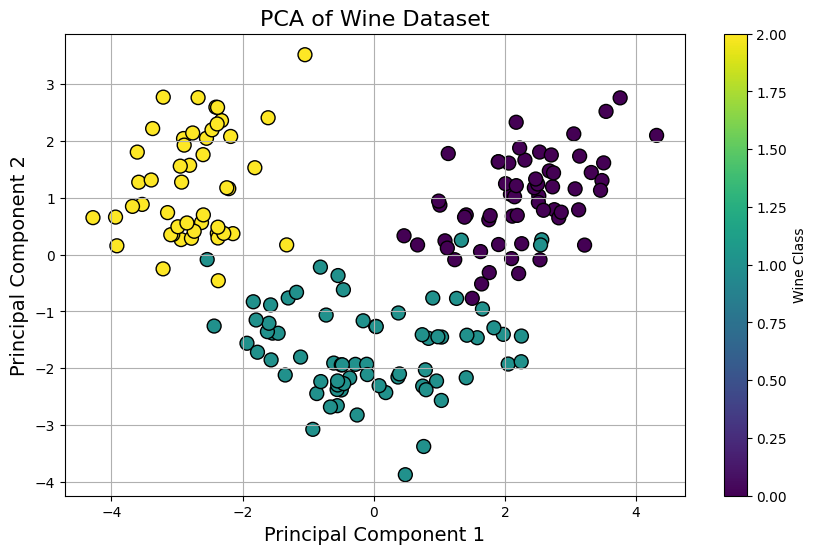

In [ ]:
import matplotlib.pyplot as plt

pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])

pca_df['target'] = y

plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'],
                      c=pca_df['target'], cmap='viridis', edgecolor='k', s=100)

plt.colorbar(scatter, label='Wine Class')

plt.title('PCA of Wine Dataset', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)

plt.grid()
plt.show()

5. **Task 5**: Apply **K-Means Clustering** on the 2 principal components with 3 clusters.
   - Output: Plot the clusters and show the cluster labels on the 2D PCA plot.

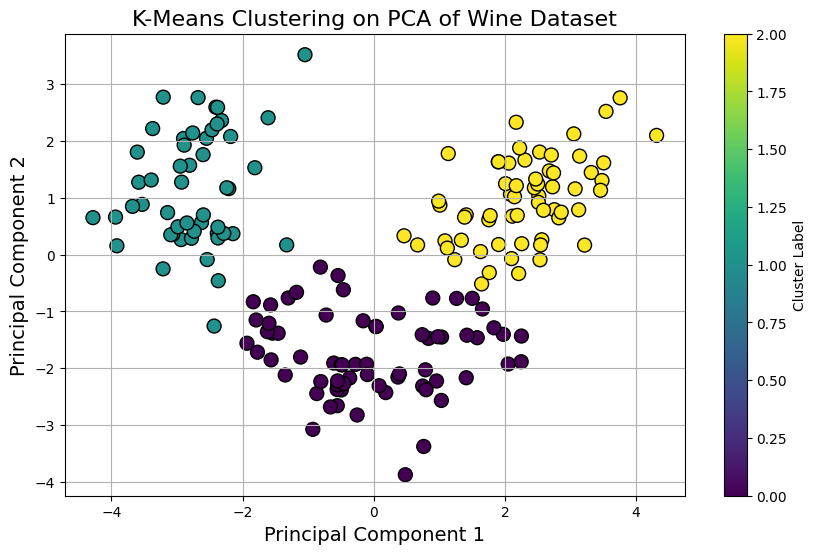

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_pca)

cluster_labels = kmeans.labels_

pca_df['Cluster'] = cluster_labels

plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'],
                      c=pca_df['Cluster'], cmap='viridis', edgecolor='k', s=100)

plt.colorbar(scatter, label='Cluster Label')

plt.title('K-Means Clustering on PCA of Wine Dataset', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)

plt.grid()
plt.show()


---